<a href="https://colab.research.google.com/github/shourav47/Data-Analysis/blob/main/Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing the library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/dataset/supermarket_sales - Sheet1.csv')


In [6]:
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
#find all rows having the price graeter than 100$
df_price = df[df['Unit price']>80.00]
display(df_price.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
21,371-85-5789,B,Mandalay,Normal,Male,Health and beauty,87.98,3,13.1970,277.1370,3/5/2019,10:40,Ewallet,263.94,4.761905,13.1970,5.1


In [10]:
df_city = df['City'].value_counts()
print(df_city)

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


In [11]:
#find all the rows with city name Mandaly
df_city_mandaly = df[df['City'] == 'Mandalay']
display(df_city_mandaly)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.800,520.800,1/3/2019,19:08,Credit card,496.00,4.761905,24.800,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.148,633.108,1/28/2019,15:46,Credit card,602.96,4.761905,30.148,8.4
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.00,4.761905,38.300,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18:35,Ewallet,174.90,4.761905,8.745,6.6


In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [13]:
#plt.style.use('seaborn')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


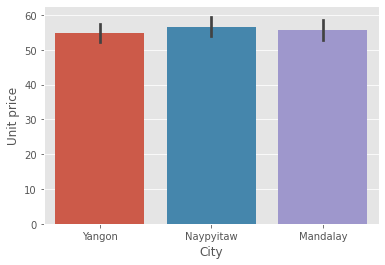

In [14]:
sns.barplot(df['City'],df['Unit price'])
plt.show()

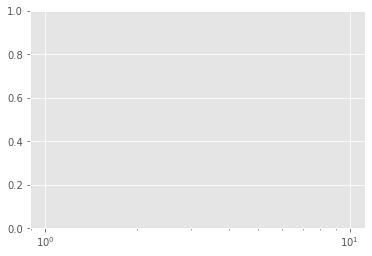

In [15]:
plt.xscale('log')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


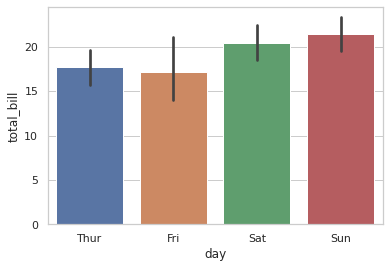

In [16]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)
tips.info()


In [17]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [1]:
x = 8
y = 9
print(not(not(x < 3) and not(y > 14 or y > 10)))

False


In [2]:
print(not(y > 14 or y > 10))

True


In [ ]:
#find all the customer details who have spend more than 60$ to market